In [1]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 11.08 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 52.7 MB/s eta 0:00:00


In [2]:
# Download and unzip the dataset directly from Roboflow
!curl -L "https://universe.roboflow.com/ds/Q7TwIdRrtb?key=jFbcCnBLAL" > roboflow.zip
!unzip roboflow.zip
!rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   1921      0 --:--:-- --:--:-- --:--:--  1919
100 77.4M  100 77.4M    0     0  9074k      0  0:00:08  0:00:08 --:--:-- 14.5M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/abc006_jpg.rf.36090a002b3521f8b5b39e869e4b6db2.jpg  
 extracting: test/images/abc023_jpg.rf.9b8133a0517c6e22d2aa03ce9e6eae3c.jpg  
 extracting: test/images/abc030_jpg.rf.804647b450663df43bff79574324c583.jpg  
 extracting: test/images/abc040_jpg.rf.69eeda6d5ab8441b8561ed6054ff9c2e.jpg  
 extracting: test/images/abc046_jpg.rf.4ba106ea056a6fffa0a3f20b36efd20c.jpg  
 extracting: test/images/abc053_jpg.rf.d9313b8ffc7f34d2a029bd28565bd66c.jpg  
 extracting: test/images/abc068_jp

In [3]:

train: '../train/images'
val: '../valid/images'

nc: 1  # Number of classes (e.g., fire)
names: ['fire']  # List of class names
nc: 2
names: ['smoke']



In [4]:
# Write the custom YOLOv5 configuration to a .yaml file
model_config = """
# parameters
nc: 2  # number of classes
depth_multiple: 0.33
width_multiple: 0.50

# anchors
anchors:
  - [10,13, 16,30, 33,23]
  - [30,61, 62,45, 59,119]
  - [116,90, 156,198, 373,326]

# YOLOv5 backbone
backbone:
  [[-1, 1, Focus, [64, 3]],
   [-1, 1, Conv, [128, 3, 2]],
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]]
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],
   [-1, 3, BottleneckCSP, [512, False]],

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],
   [-1, 3, BottleneckCSP, [256, False]],

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],
   [-1, 3, BottleneckCSP, [512, False]],

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],
   [-1, 3, BottleneckCSP, [1024, False]],

   [[17, 20, 23], 1, Detect, [nc, anchors]]
  ]
"""

# Save the configuration to a file
with open('custom_yolov5.yaml', 'w') as f:
    f.write(model_config)


In [ ]:
  # Train the YOLOv5 model with the custom dataset
  !python train.py --img 720 --batch 16 --epochs 100 --data data.yaml --weights yolov5s.pt --name forest-fire-detection


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-10-29 07:16:15.216741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 07:16:15.236269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 07:16:15.242398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-28 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


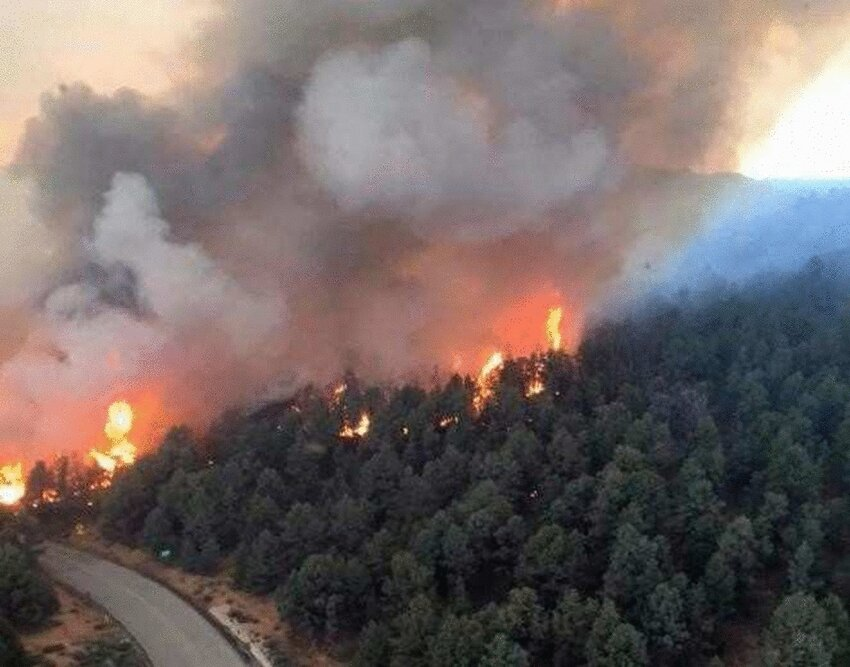

Saved 1 image to runs/detect/exp5


In [ ]:
import torch

# Load the trained model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/forest-fire-detection/weights/best.pt')

# Perform detection on an image
img_path = '/content/Test-picture-used-for-thermal-diagram.png'  # Replace with your test image path
results = model(img_path)

# Display and save the results
results.show()  # Display the image with bounding boxes
results.save()  # Save the image with detected results


In [ ]:
!python detect.py --weights runs/train/forest-fire-detection/weights/best.pt --source /content/test.mp4


detect: weights=['runs/train/forest-fire-detection/weights/best.pt'], source=/content/test.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1686) /content/test.mp4: 384x640 (no detections), 26.6ms
video 1/1 (2/1686) /content/test.mp4: 384x640 (no detections), 7.5ms
video 1/1 (3/1686) /content/test.mp4: 384x640 (no detections), 7.5ms
video 1/1 (4/1686) /content/test.mp4: 384x640 (no detections), 7.5ms
video 1/1 (5/1686) /c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')